# EDA

1. Data profiling
2. Conclusions from profiling 
3. Chat with your data, some ai agent maybe 
4. ChatGPT Suggestions (what is good idea to keep in mind)
5. Data types (numerical, categorical)
6. Correlation
7. Missing values —> decision about imputation
8. Outliers
9. Univariate Analysis (use data profiling)
10. Bivariate Analysis 
11. Multivariate Analysis 
12. Testing Hypothesis and Assumptions 
13. ChatGPT Suggestions analysis
14. Time series analysis 

In [14]:
import polars as pl
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

pd.set_option('display.max_columns', None)

### 1. Data profiling 

In [6]:
# Load training dataset as pandas dataframe to use ydata_profiling and EDA 
df = pd.read_excel("../data/01_raw/IWA-External-Scope-3-Data.xlsx", sheet_name="3%")

In [3]:
# Default template function for data profiling
def data_profiling(df: pd.DataFrame, name: str="data_profiling_report", interface: str="html") -> None:
  """
  This function generates a data profiling report using the pandas_profiling package.
  
  Args:
      df (pd.DataFrame): The DataFrame to profile.
      name (str, optional): The title of the profile report. Defaults to "data_profiling_report".
      interface (str, optional): The format of the report. Defaults to "html".
                                  Choose between 'html' or 'widget'.
  
  Raises:
      ValueError: If df is not a pandas DataFrame or name is not a string or 
                  if interface is not 'html' or 'widget'
  """
  
  # Check if df is a pandas DataFrame
  if not isinstance(df, pd.DataFrame):
    raise ValueError("df should be a pandas DataFrame")
    
  # Check if name is a string
  if not isinstance(name, str):
    raise ValueError("name should be a string")
  
  # Check if interface is a string and a valid option
  if not isinstance(interface, str) or interface not in ['html', 'widget']:
    raise ValueError("interface should be a string, either 'html' or 'widget'")
  
  profile = ProfileReport(df, title=name, explorative=True)

  if interface == "html":
    profile.to_file(f"{name}.html")
    logging.info(f"Report {name} generated in html format, check files.")
    
  elif interface == "widget":
    logging.info(f"Report {name} will be generated as a widget, it might take a while.")
    profile.to_widgets()


In [4]:
# Raw data profiling 
# Commented because profiling file already created
# data_profiling(df)

### Conclusions and Questions based on profiling

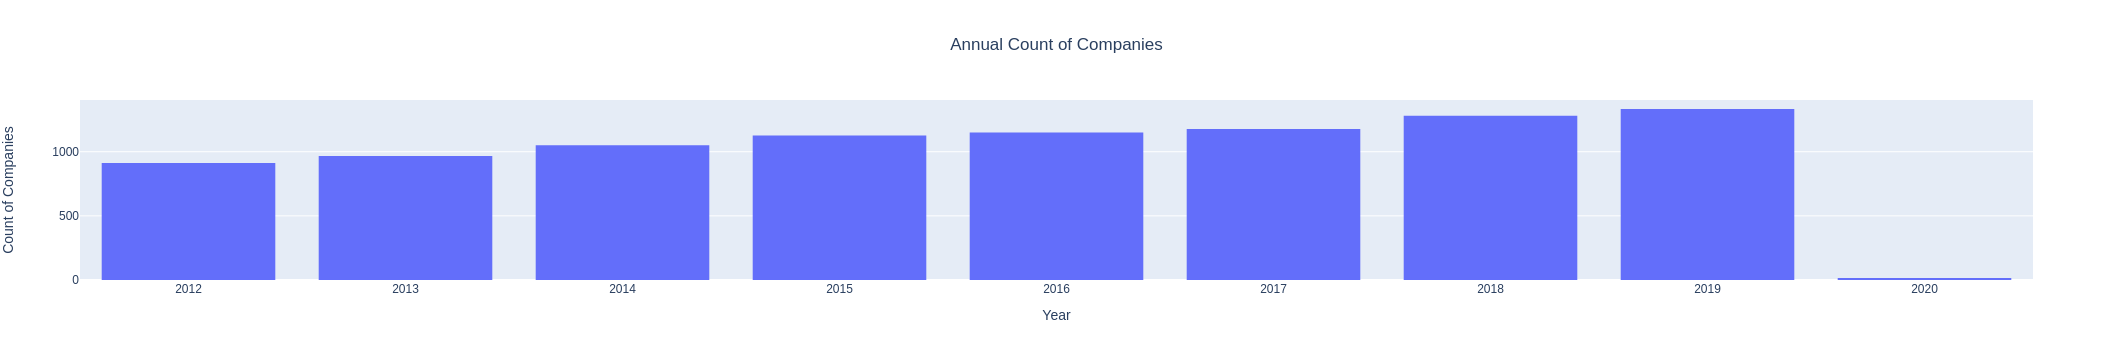

In [ ]:
# FROM HOW MANY YEARS DO WE HAVE DATA?

fig = go.Figure(data=[go.Histogram(x=df['Year'])])

# Update layout for the figure
fig.update_layout(
    title_text="Annual Count of Companies",
    title_x=0.5,  # center the title
    xaxis_title_text='Year',
    yaxis_title_text='Count of Companies',
    bargap=0.2,  # gap between bars
    autosize=True,
    yaxis=dict(
        automargin=True,
        title_standoff=30
    ),
)

# Update yaxis settings
fig.update_yaxes(automargin=True)

fig.show()

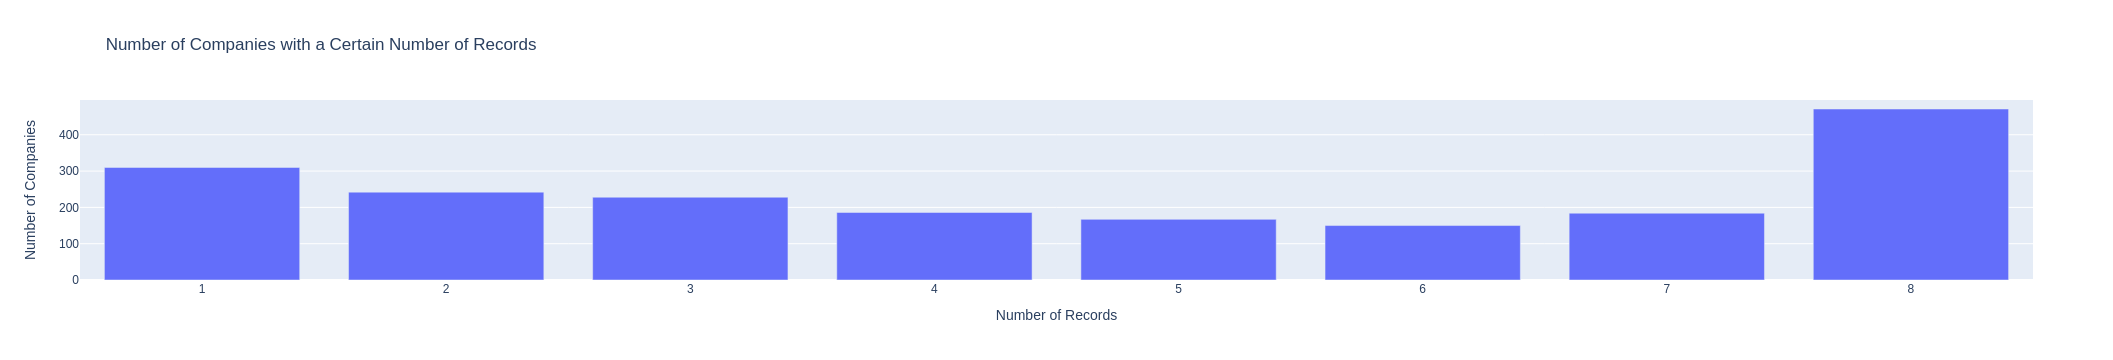

In [ ]:
# HOW OFTEN DO COMPANIES APPEAR IN THE DATASET?

# Count the number of occurrences for each company
company_counts = df['Company Name'].value_counts()

# Count the number of companies with a certain number of records
record_counts = company_counts.value_counts()

# Create DataFrame for plotting
df_counts = pd.DataFrame({'Number of Records': record_counts.index, 'Number of Companies': record_counts.values})

# Create the bar chart
fig = px.bar(df_counts, x='Number of Records', y='Number of Companies', title='Number of Companies with a Certain Number of Records')

# Show the plot
fig.show()

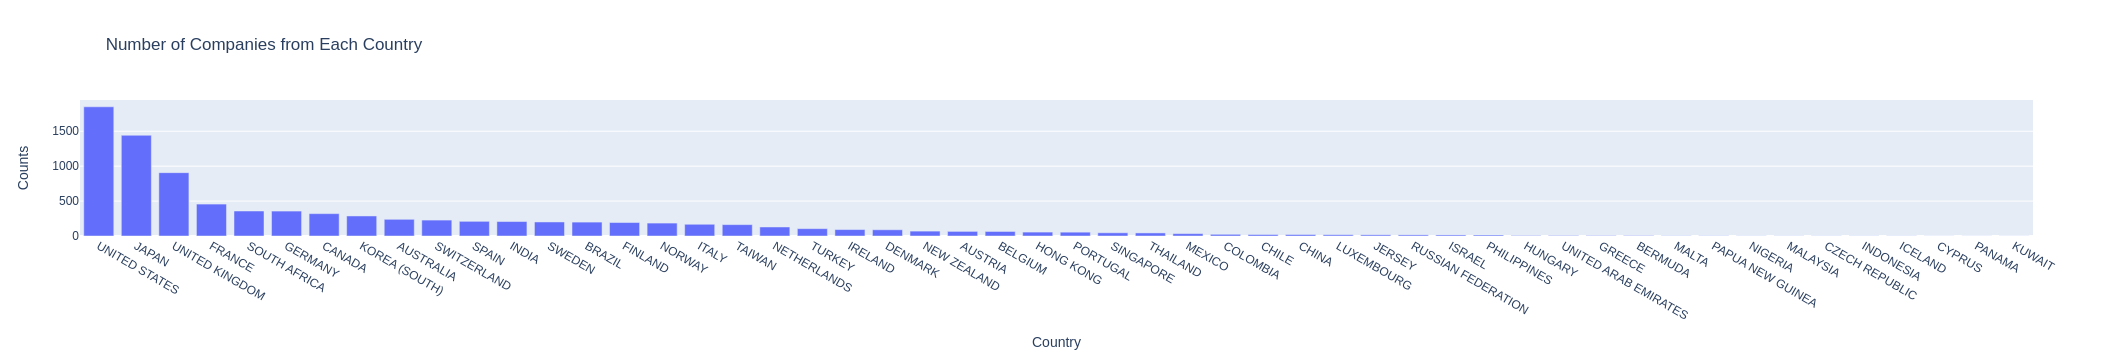

In [ ]:
# FROM WHICH COUNTRIES WE HAVE COMPANIES DATA

# Count the number of occurrences for each country
country_counts = df['Country'].value_counts()

# Create DataFrame for plotting
df_counts = pd.DataFrame({'Country': country_counts.index, 'Counts': country_counts.values})

# Create the bar chart
fig = px.bar(df_counts, x='Country', y='Counts', title='Number of Companies from Each Country')

# Show the plot
fig.show()

In [ ]:
# Z JAKICH KONTYNENTOW SA TE FIRMY POZNIEJ 

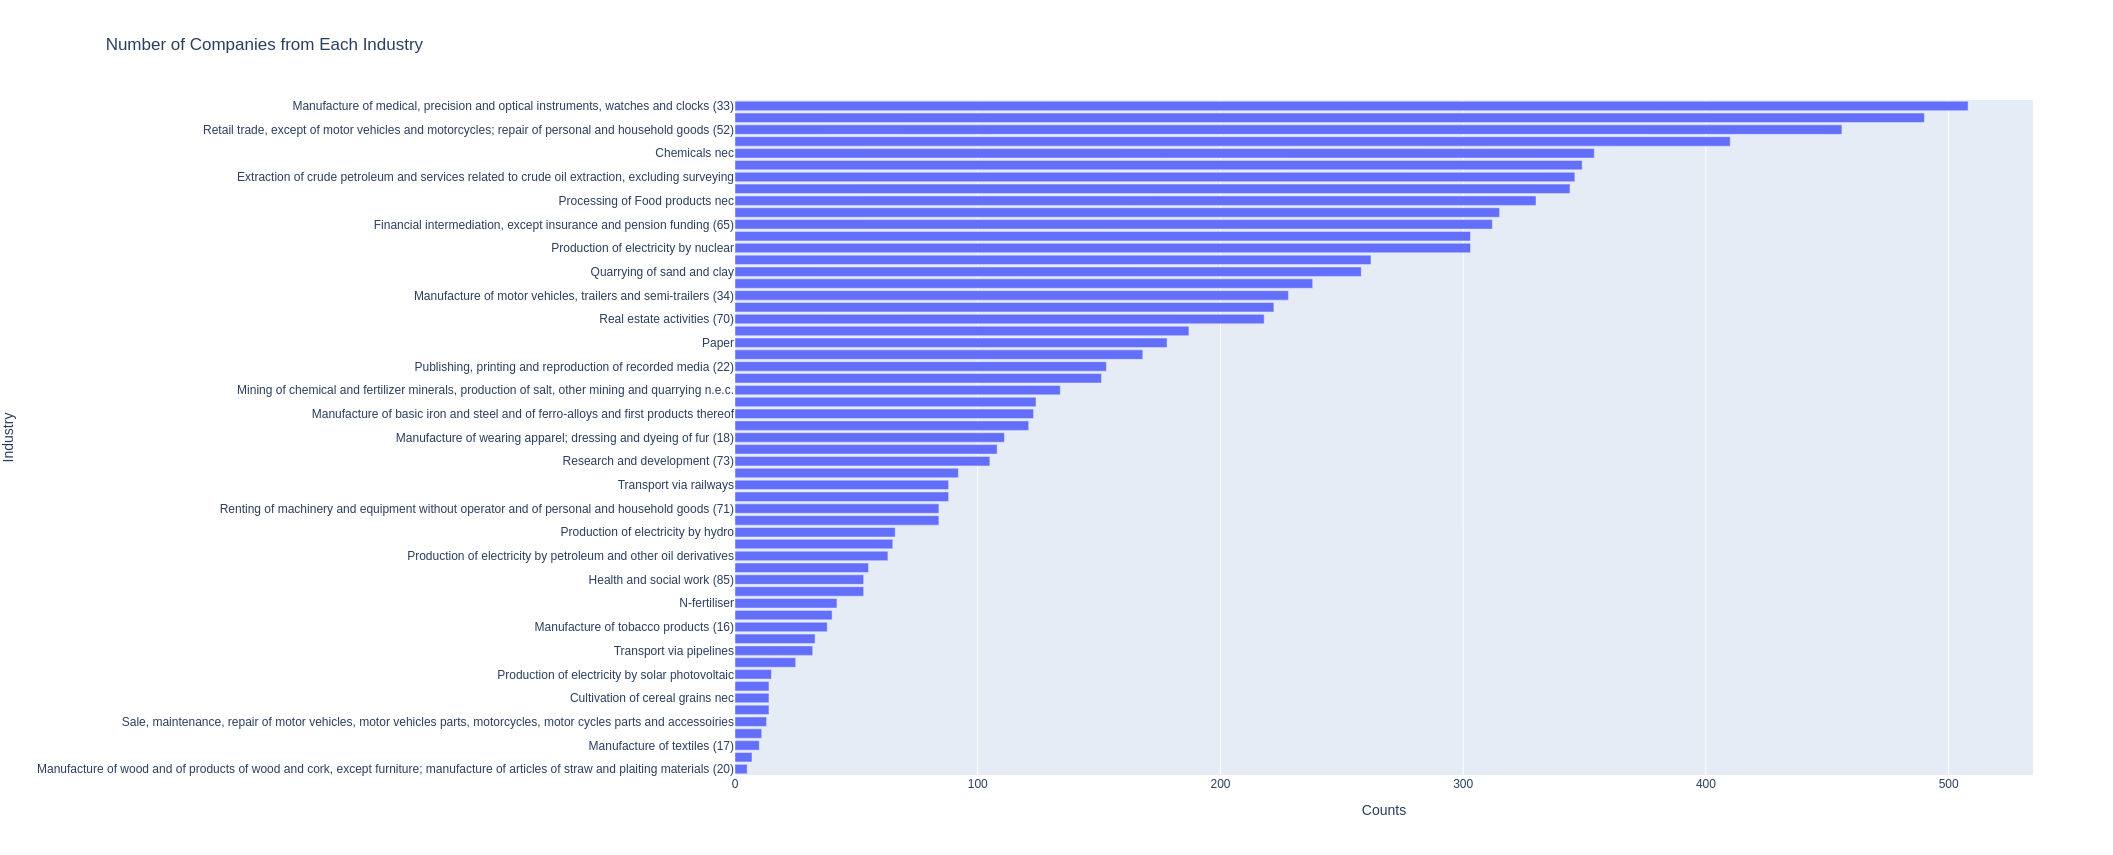

In [ ]:
# Z JAKICH BRANZ SA TE FIRMY 

# Count the number of occurrences for each industry
industry_counts = df['Industry (Exiobase)'].value_counts()

# Create DataFrame for plotting
df_industry = pd.DataFrame({'Industry': industry_counts.index, 'Counts': industry_counts.values})

# Sort the DataFrame by 'Counts' in descending order
df_industry = df_industry.sort_values('Counts', ascending=False)

# Calculate plot height based on the number of industries
height = len(industry_counts) * 15  # Modify the multiplier to get the desired bar width

# Create the bar chartb
fig = px.bar(df_industry, x='Counts', y='Industry', title='Number of Companies from Each Industry', orientation='h', height=height)

# Reverse the order of categories on the y-axis
fig.update_yaxes(autorange="reversed")

# Show the plot
fig.show()

#### Compute correlation matrix

In [17]:
df.columns

Index(['Year', 'Company Name', 'Country', 'Industry (Exiobase)',
       'GHG Intensity (Sales)', 'GHG Intensity (Op Income)',
       'Total GHG Environmental Impact (Scope 1, 2, 3)', 'Scope 1', 'Scope 2',
       'Scope 3 ', 'Business Travel', 'Business Travel Set',
       'Business Travel Imputed', 'Capital Goods', 'Capital Goods Set',
       'Capital Goods Imputed', 'Downstream Leased Assets',
       'Downstream Leased Assets Set', 'Downstream Leased Assets Imputed',
       'Downstream Transportation and Distribution',
       'Downstream Transportation and Distribution Set',
       'Downstream Transportation and Distribution Imputed',
       'Employee Commuting', 'Employee Commuting Set',
       'Employee Commuting Imputed', 'End of Life Treatment of Sold Products',
       'End of Life Treatment of Sold Products Set',
       'End of Life Treatment of Sold Products Imputed', 'Franchises',
       'Franchises Set', 'Franchises Imputed',
       'Fuel-and-energy-related activities (not inc

In [18]:
# Select only the columns you want to include in the correlation matrix
numercial_cols = ['GHG Intensity (Sales)', 'GHG Intensity (Op Income)', 
                 'Total GHG Environmental Impact (Scope 1, 2, 3)', 'Scope 1', 
                 'Scope 2', 'Scope 3 ', 'Business Travel', 'Capital Goods', 
                 'Downstream Leased Assets', 'Downstream Transportation and Distribution',
                 'Employee Commuting', 'End of Life Treatment of Sold Products', 
                 'Franchises', 'Fuel-and-energy-related activities (not included in Scope 1 or 2)', 
                 'Investments', 'Processing of Sold Products', 
                 'Purchased Goods and Services', 'Upstream Leased Assets', 
                 'Upstream Transportation and Distribution', 'Use of Sold Products',
                 'Waste Generated in Operations']

df_numerical_cols = df[numercial_cols]

# Compute the correlation matrix
corr_matrix = df_numerical_cols.corr()


In [12]:
# GHG Intensity Sales correlation

# Extract only the "GHG Intensity (Sales)" column from the correlation matrix
ghg_sales_corr = corr_matrix["GHG Intensity (Sales)"]

# Convert the series to DataFrame for the heatmap
ghg_sales_corr = pd.DataFrame(ghg_sales_corr).T

# Create a heatmap
heatmap_ghg_sales = ff.create_annotated_heatmap(z=ghg_sales_corr.values, 
                                                x=list(ghg_sales_corr.columns), 
                                                y=["GHG Intensity (Sales)"], 
                                                annotation_text=ghg_sales_corr.round(2).values,
                                                colorscale='Viridis')

# Add title
heatmap_ghg_sales.update_layout(title_text='<i><b>Correlation with GHG Intensity (Sales)</b></i>', 
                                title_x=0.5)

# Show heatmap
heatmap_ghg_sales.show()

NameError: name 'corr_matrix' is not defined

In [ ]:
# 5 missing values

In [ ]:
# WYSOKA KORELACJA GHG OP INCOME Z JEDNA ZMIENNA + MISSING VAUES + SKEWED DATA 